In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import auc
from pathlib import Path
base_folder, thresholds_file = 'results/schaefer400', 'global_metrics.csv'
networks = ['', 'Cont', 'Default', 'DorsAttn', 'SalVentAttn']
networks_names = {'': 'General', 'Cont': 'Frontoparietal', 'Default': 'Default', 'DorsAttn': 'Atencional dorsal', 'SalVentAttn': 'Atencional ventral/Saliencia'}

In [2]:
def add_curve(thresholds, avg_clustering, lower_error, upper_error, group, ax):
    ax.plot(thresholds, avg_clustering, label=group)
    ax.plot(thresholds, lower_error, alpha=0.1)
    ax.plot(thresholds, upper_error, alpha=0.1)
    ax.legend()
    ax.fill_between(thresholds, lower_error, upper_error, alpha=0.2)

In [3]:
def plot_measure(base_folder, networks, measure_label, measure_desc):
    fig, axes = plt.subplots(figsize=(15, 15), nrows=len(networks) // 2 + 1, ncols=2)
    aucs = {network: {} for network in networks}
    for i, network in enumerate(networks):
        network_path = f'{base_folder}_{network}' if network else base_folder
        df = pd.read_csv(Path(network_path, thresholds_file), index_col=0)
        ax = axes[i // 2, i % 2]
        groups = df['group'].unique()
        for group in groups:
            group_metrics = df[df['group'] == group]
            thresholds = group_metrics['threshold'].values
            avg_clustering = group_metrics[measure_label].values
            lower_error, upper_error = group_metrics[measure_label] - group_metrics[f'{measure_label}_ste'], group_metrics[measure_label] + group_metrics[f'{measure_label}_ste']
            aucs[network][group] = auc(thresholds, avg_clustering)
            add_curve(thresholds, avg_clustering, lower_error, upper_error, group, ax)
    
        if network in networks_names:
            network = networks_names[network]
        ax.set_title(f'{network}')
        ax.set_xlabel('Densidad de aristas')
        ax.set_ylabel(measure_desc)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    fig.suptitle(measure_desc)
    fig.savefig(f'results/schaefer400_{measure_label}.png')
    plt.show()
    
    return aucs

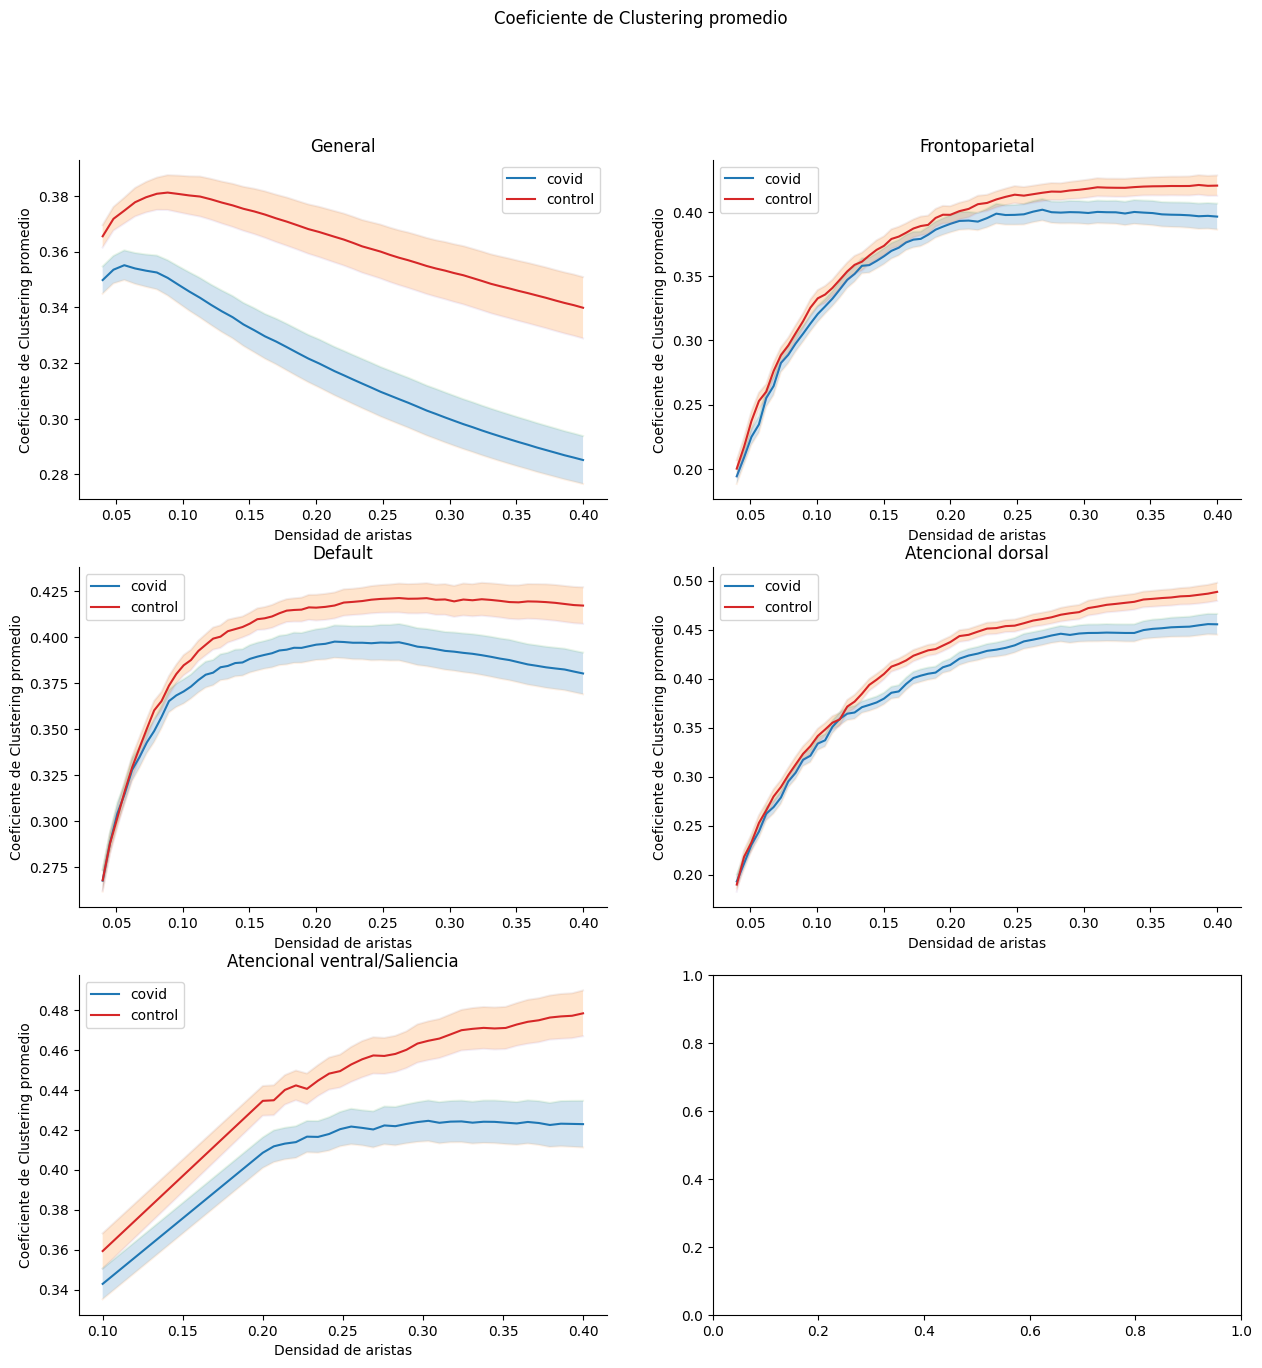

{'': {'covid': 0.11462287776606064, 'control': 0.1306845436965718},
 'Cont': {'covid': 0.13180250155021142, 'control': 0.13665304019952243},
 'Default': {'covid': 0.13689292878925277, 'control': 0.14470640489014086},
 'DorsAttn': {'covid': 0.1427743653656249, 'control': 0.1500975394832088},
 'SalVentAttn': {'covid': 0.12176618671553267, 'control': 0.13183507221516477}}

In [4]:
plot_measure(base_folder, networks, 'avg_clustering', 'Coeficiente de Clustering promedio')

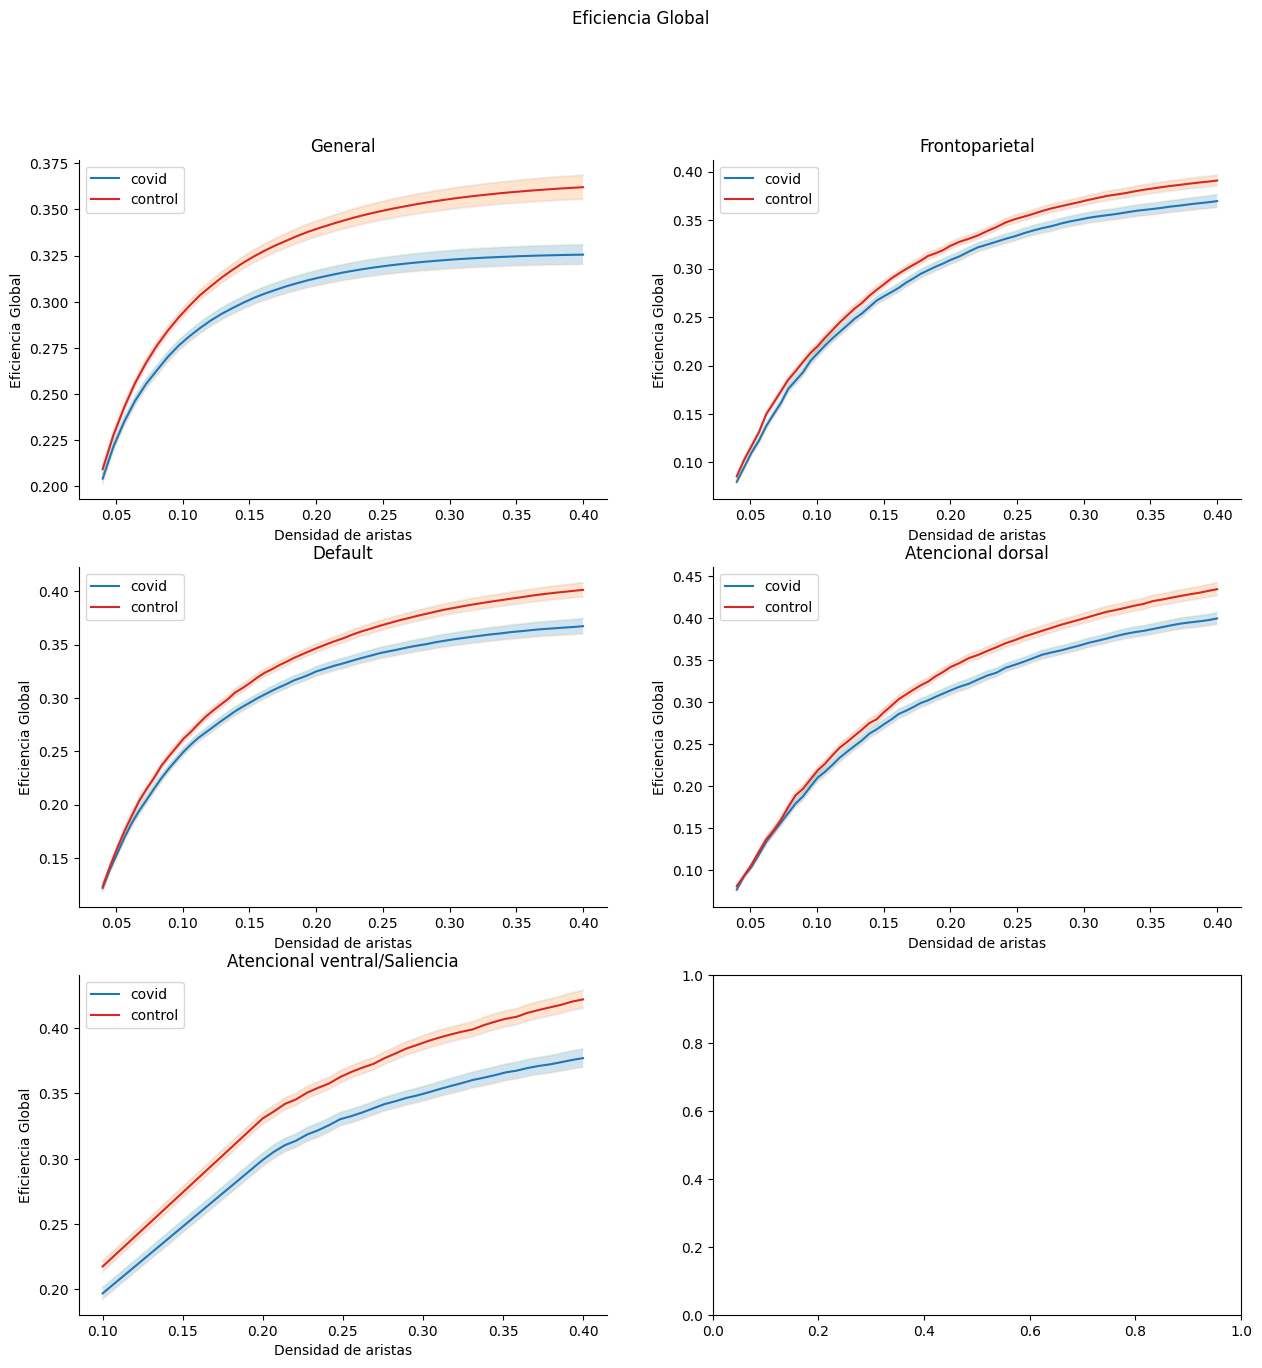

{'': {'covid': 0.10916993847590384, 'control': 0.11848133157202592},
 'Cont': {'covid': 0.10526543271571644, 'control': 0.11071618740245641},
 'Default': {'covid': 0.11124568404105709, 'control': 0.11930169745360084},
 'DorsAttn': {'covid': 0.10876121489883762, 'control': 0.11691003737717284},
 'SalVentAttn': {'covid': 0.09413095548240218, 'control': 0.10425398613806126}}

In [4]:
plot_measure(base_folder, networks, 'global_efficiency', 'Eficiencia Global')

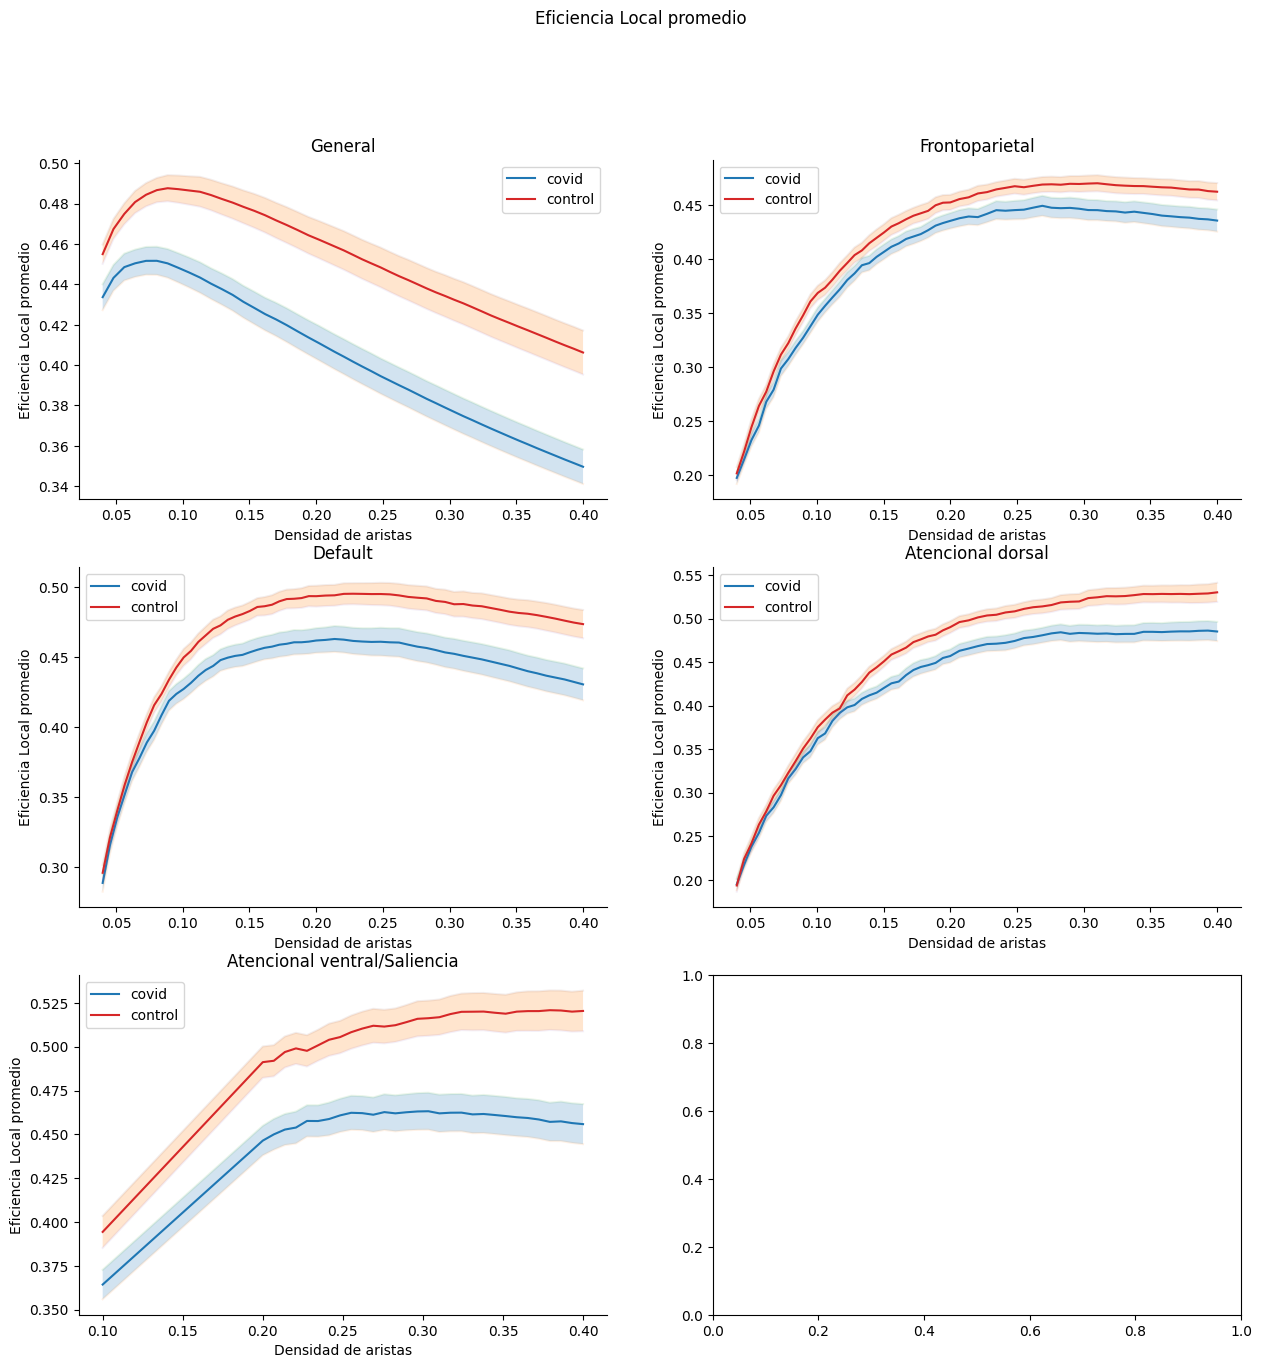

{'': {'covid': 0.1456349916810779, 'control': 0.16318035247432713},
 'Cont': {'covid': 0.14563210033254897, 'control': 0.15291994965849534},
 'Default': {'covid': 0.15787591056423167, 'control': 0.16881430857983218},
 'DorsAttn': {'covid': 0.15495357707433713, 'control': 0.1656489536518113},
 'SalVentAttn': {'covid': 0.13241037518976043, 'control': 0.14674188435626434}}

In [5]:
plot_measure(base_folder, networks, 'avg_local_efficiency', 'Eficiencia Local promedio')

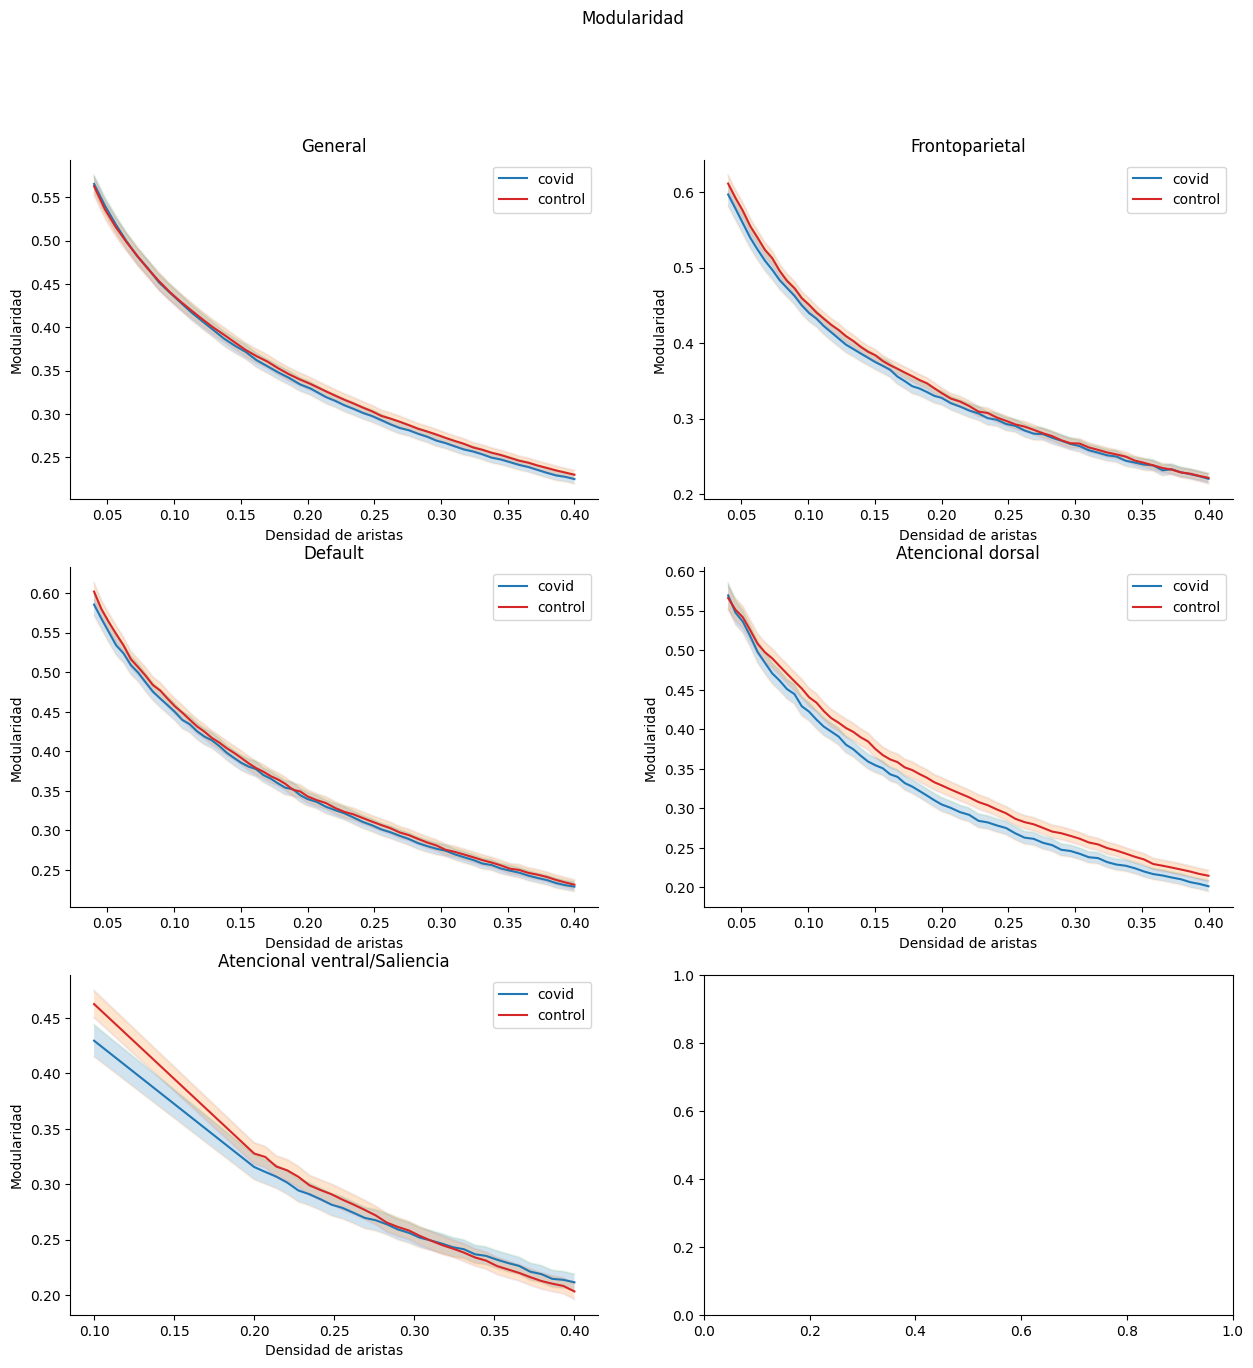

{'': {'covid': 0.12138713707222329, 'control': 0.12283962293576522},
 'Cont': {'covid': 0.12170256669107445, 'control': 0.12408117585629366},
 'Default': {'covid': 0.1252089262450641, 'control': 0.12704085655024067},
 'DorsAttn': {'covid': 0.11443399471838256, 'control': 0.12083193103350325},
 'SalVentAttn': {'covid': 0.08873559848259331, 'control': 0.09138317106257826}}

In [6]:
plot_measure(base_folder, networks, 'modularity', 'Modularidad')